In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style(style="whitegrid")

In [28]:
df = pd.read_csv("train.csv")

In [29]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 1.short EDA and checking missing values

38

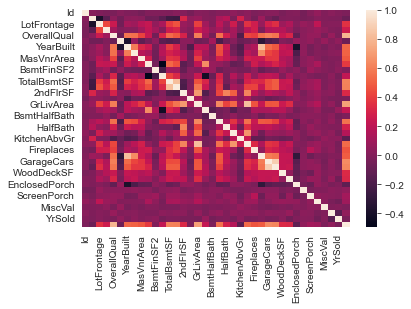

In [30]:
corr = df.corr()
sns.heatmap(corr)

corr.shape[0]

### We are not going to drop the columns with high correlation because it will be useful having them in our dataset when we fill the missing values with an ML algorithm

## Checking missing values in columns with cateogrical information

In [31]:
cat_columns_to_drop = []
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        if df[label].isna().sum() and (df[label].isna().sum() / len(df)) > 0.9:
            print(f"{label}:{df[label].isna().sum()}--{(df[label].isna().sum() / len(df)) * 100}% of information missing")
            cat_columns_to_drop.append(label)

Alley:1369--93.76712328767123% of information missing
PoolQC:1453--99.52054794520548% of information missing
MiscFeature:1406--96.30136986301369% of information missing


#### we are going to drop the columns that have more than 90% missing data
* There are 3 of them to drop

####  Checking all the categorical variables with missing values

In [32]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        if df[label].isna().sum():
            print(f"{label}:{df[label].isna().sum()}--{(df[label].isna().sum() / len(df)) * 100}% of information missing")

Alley:1369--93.76712328767123% of information missing
MasVnrType:8--0.547945205479452% of information missing
BsmtQual:37--2.5342465753424657% of information missing
BsmtCond:37--2.5342465753424657% of information missing
BsmtExposure:38--2.6027397260273974% of information missing
BsmtFinType1:37--2.5342465753424657% of information missing
BsmtFinType2:38--2.6027397260273974% of information missing
Electrical:1--0.0684931506849315% of information missing
FireplaceQu:690--47.26027397260274% of information missing
GarageType:81--5.5479452054794525% of information missing
GarageFinish:81--5.5479452054794525% of information missing
GarageQual:81--5.5479452054794525% of information missing
GarageCond:81--5.5479452054794525% of information missing
PoolQC:1453--99.52054794520548% of information missing
Fence:1179--80.75342465753424% of information missing
MiscFeature:1406--96.30136986301369% of information missing


## Checking missing values in columns with numerical information
* 1.First let's check if there are columns that have 90% missing data 
* 2.Then, let's see how many missing data there are in numerical columns

In [33]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum() and (df[label].isna().sum() / len(df)) > 0.9:
            print(f"{label}:{df[label].isna().sum()}--{(df[label].isna().sum() / len(df)) * 100}% of information missing")

#### There are no columns that have more than 90% missing data

In [34]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum():
            print(f"{label}:{df[label].isna().sum()}")

LotFrontage:259
MasVnrArea:8
GarageYrBlt:81


#### There are 3 columns with missing data that we need to fill (with ML algorithm)

# 2.Encoding cateogrical variables
**(we should to encode categorical variables in the best way (without losing much information) possible, and from there we will fill categorical missing values by making missing rows test dataset and the other train dataset)**
* 1.(EDA of categorical variables) let's choose an encoding method for our purposes(view the categorical values if they are suitable for label encoding etc.)

In [35]:
categorical_columns = []
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        categorical_columns.append(label)
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
# There are 43 categorical columns
len(categorical_columns)

43

In [37]:
categorical_df = df[categorical_columns].copy()
categorical_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [38]:
cat_columns_to_drop# These 3 will be dropped

['Alley', 'PoolQC', 'MiscFeature']

In [39]:
categorical_df = categorical_df.drop(cat_columns_to_drop, axis=1).copy()

In [40]:
categorical_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,WD,Normal


### First let's analyze only one categorical variable and then we build a function to analyse the rest

### This is the source of methods to be used when analysing variables
https://www.kaggle.com/code/nextbigwhat/eda-for-categorical-variables-a-beginner-s-way

In [41]:
col = "Fence"#choice of categorical variable

In [42]:
print("value counts:\n {}\n".format(categorical_df[col].value_counts()))
print("distinct values: {}\n".format(categorical_df[col].unique()))
print("count of distinct values: {}\n".format(len(categorical_df[col].unique())))
print("missing values: {}--{}% of full data missing".format(categorical_df[col].isna().sum(),(categorical_df[col].isna().sum()/len(categorical_df)*100)))

value counts:
 MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

distinct values: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']

count of distinct values: 5

missing values: 1179--80.75342465753424% of full data missing


<AxesSubplot:xlabel='Fence', ylabel='count'>

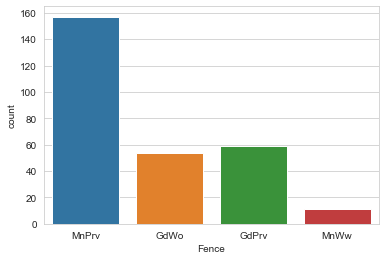

In [43]:
sns.countplot(data=categorical_df, x=col)

#### QUOTE:
**Since we are working on a supervised ML problem we should also look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.**

In [44]:
categorical_df["SalePrice"] = df.loc[categorical_df.index, 'SalePrice'].copy()

In [45]:
categorical_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,NaN,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,NaN,Attchd,Unf,TA,TA,Y,NaN,WD,Normal,142125


<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

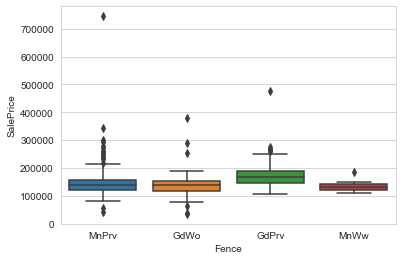

In [46]:
sns.boxplot(data=categorical_df, x=col, y="SalePrice")

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

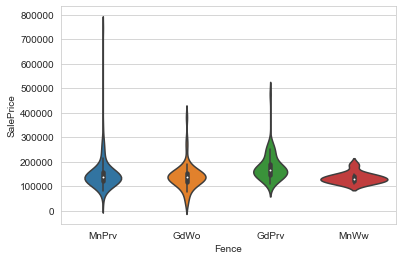

In [47]:
sns.violinplot(data=categorical_df, x=col, y="SalePrice")

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

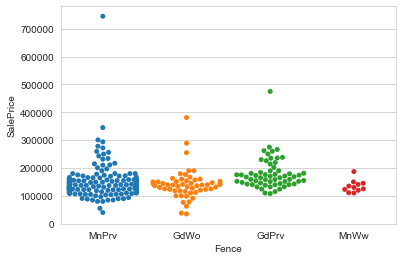

In [48]:
sns.swarmplot(data=categorical_df, x=col, y="SalePrice")

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

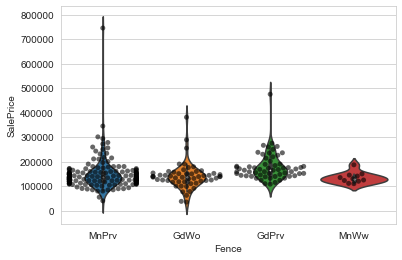

In [49]:
sns.violinplot(data=categorical_df, x=col, y="SalePrice")
sns.swarmplot(data=categorical_df, x=col, y="SalePrice", color="k", alpha=0.6)

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

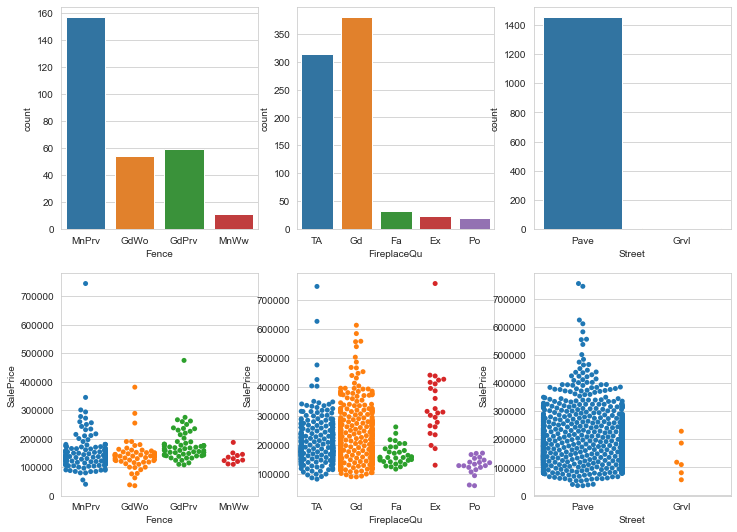

In [50]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)
sns.countplot(data=categorical_df, x="Fence", ax=ax1)
sns.swarmplot(data=categorical_df, x="Fence", y="SalePrice", ax=ax4)
sns.countplot(data=categorical_df, x="FireplaceQu", ax=ax2)
sns.swarmplot(data=categorical_df, x="FireplaceQu", y="SalePrice", ax=ax5)
sns.countplot(data=categorical_df, x="Street", ax=ax3)
sns.swarmplot(data=categorical_df, x="Street", y="SalePrice", ax=ax6)

### Making it into a function

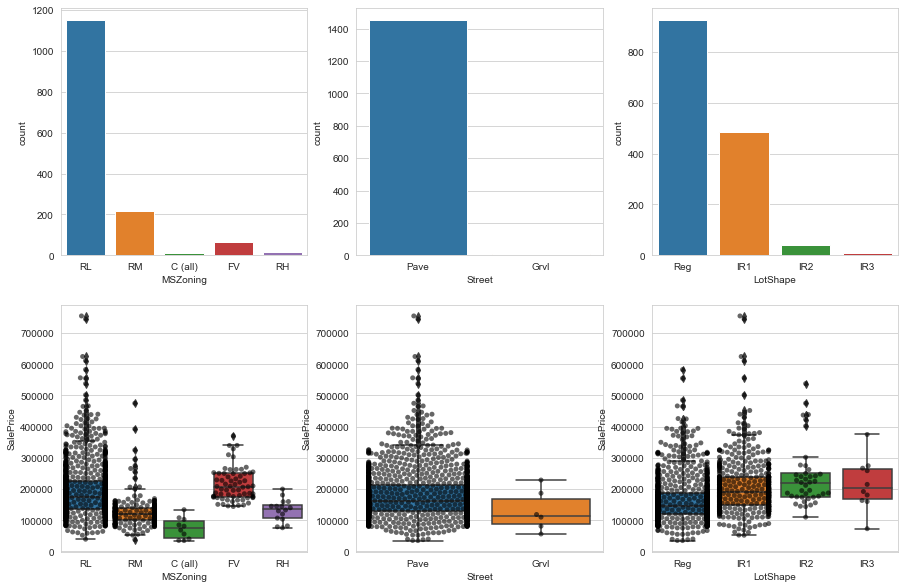

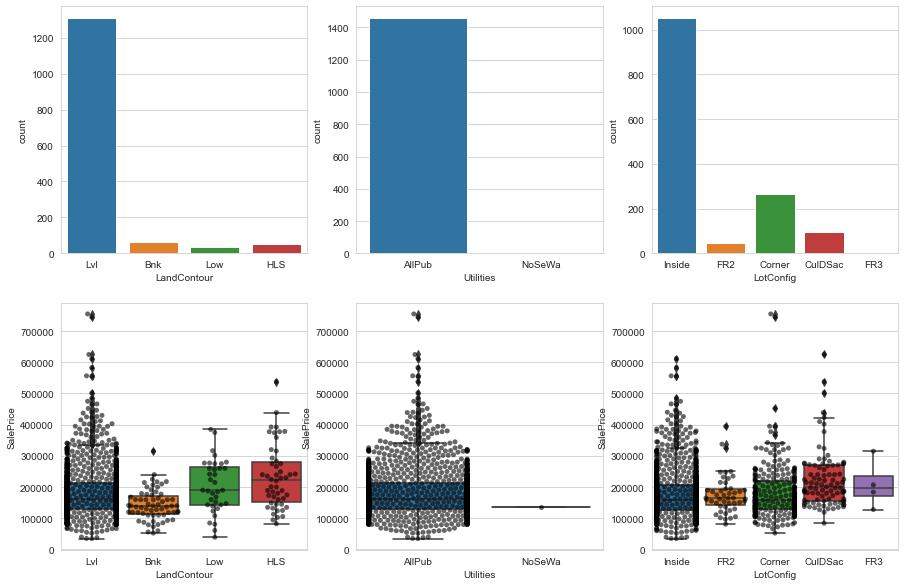

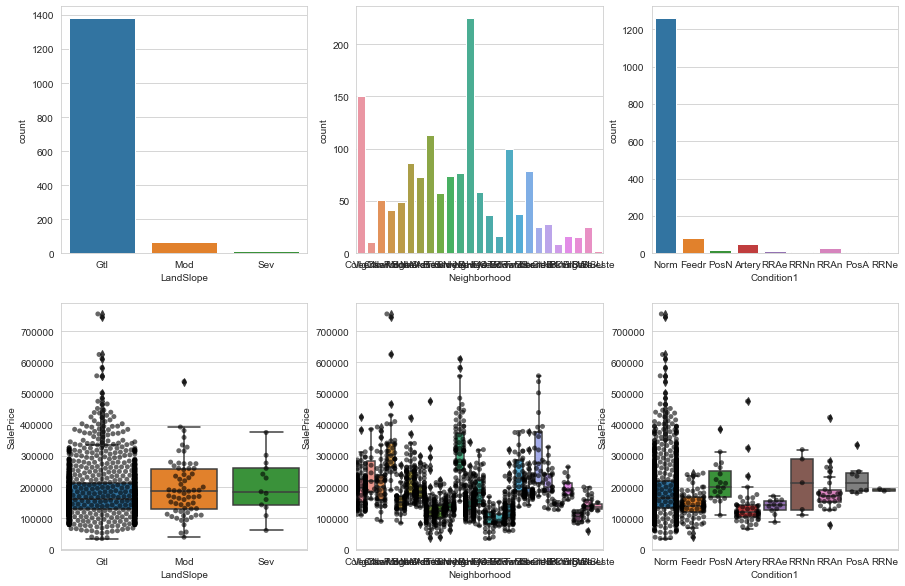

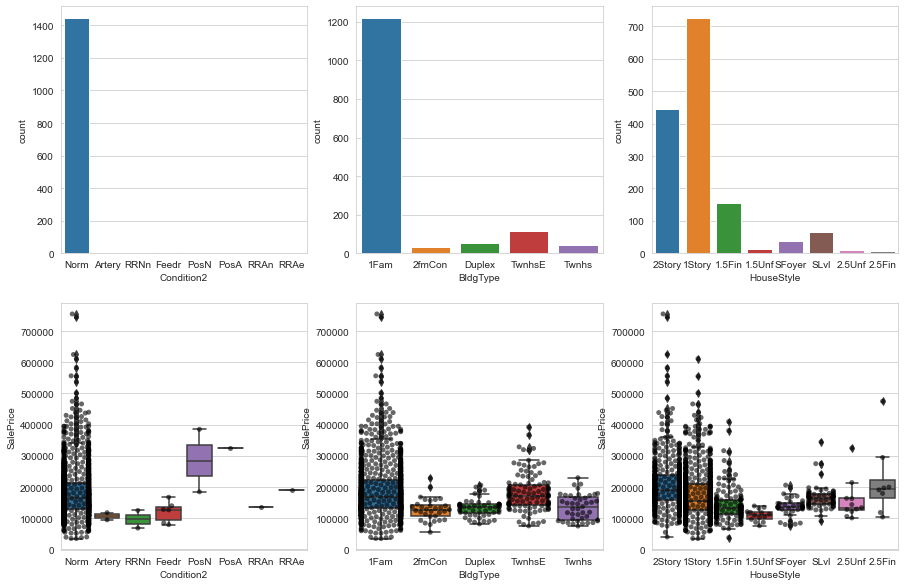

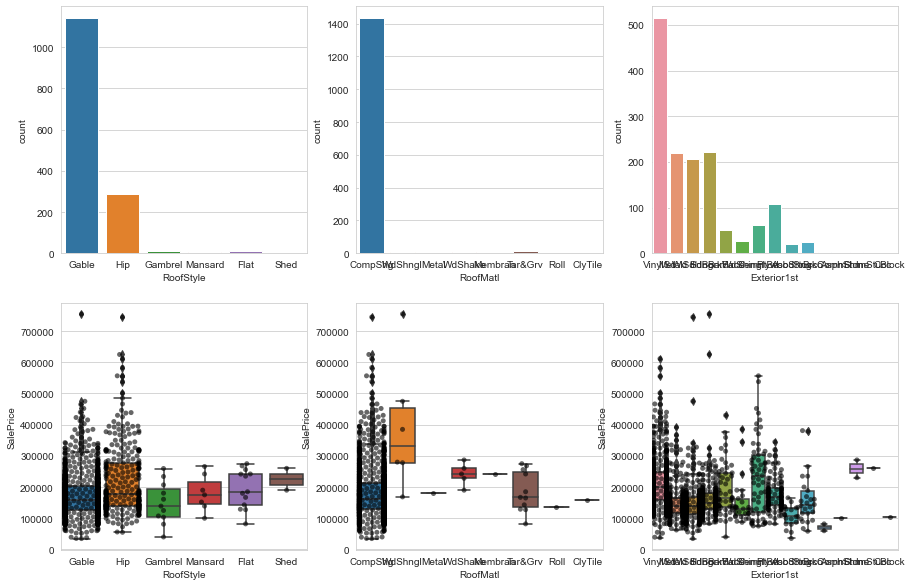

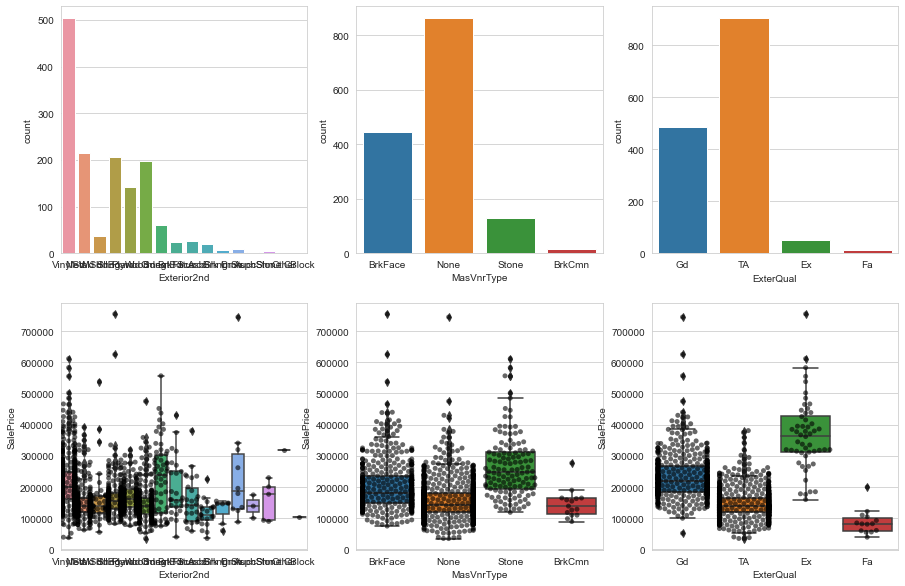

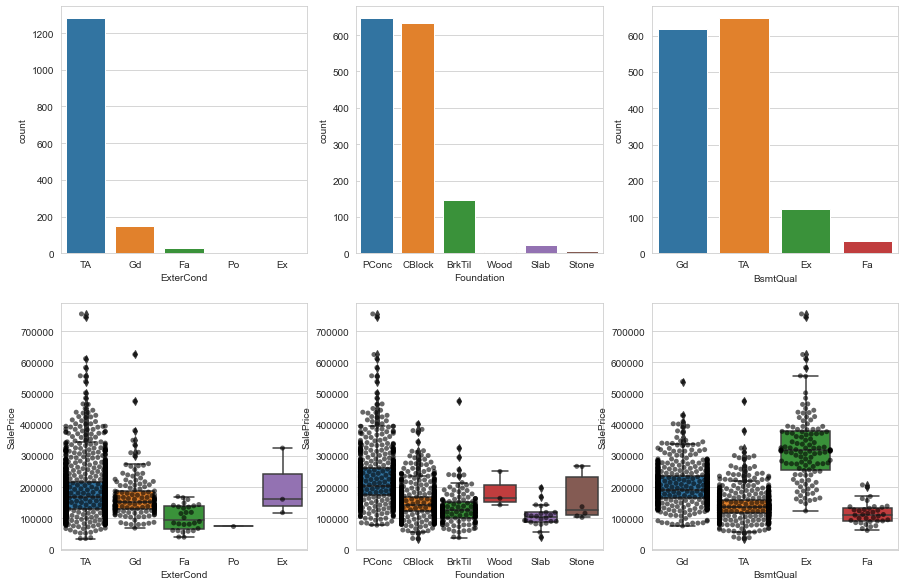

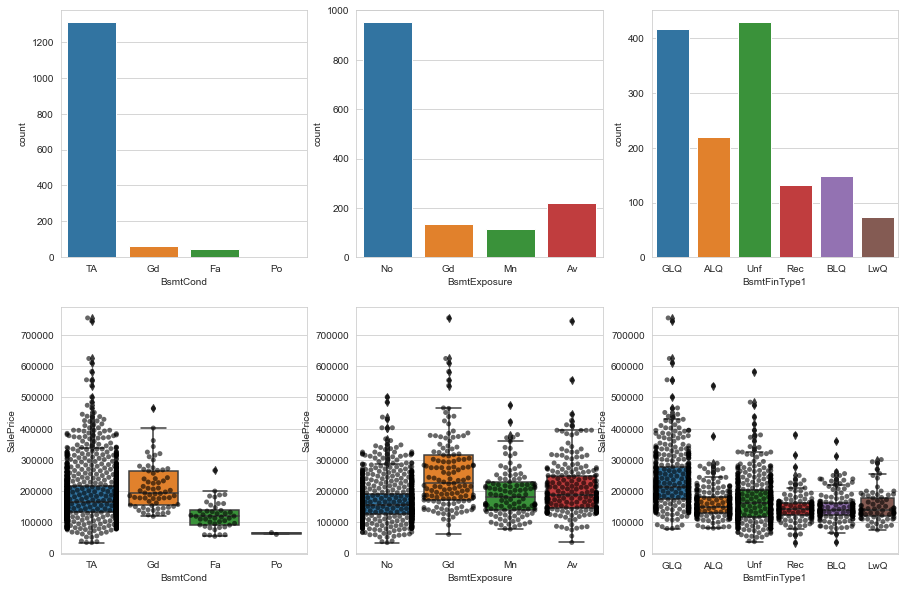

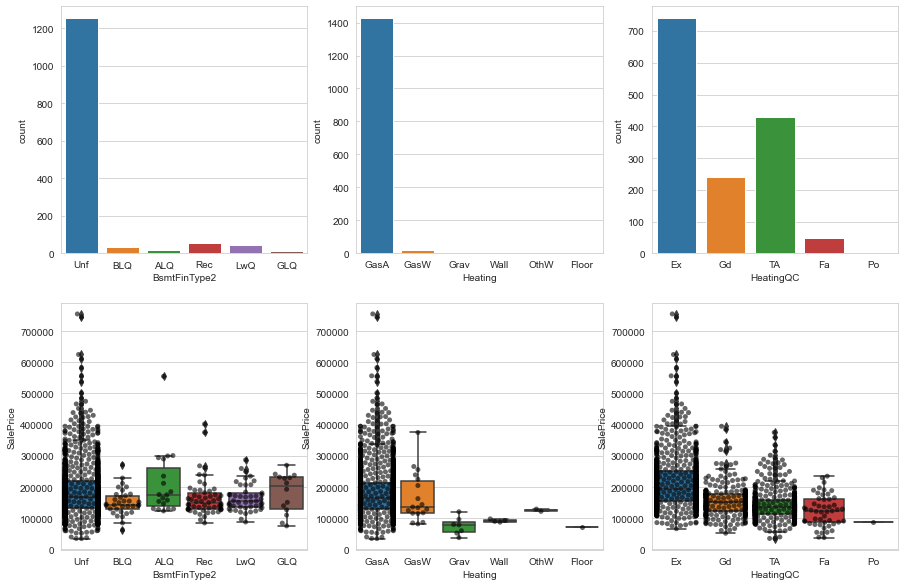

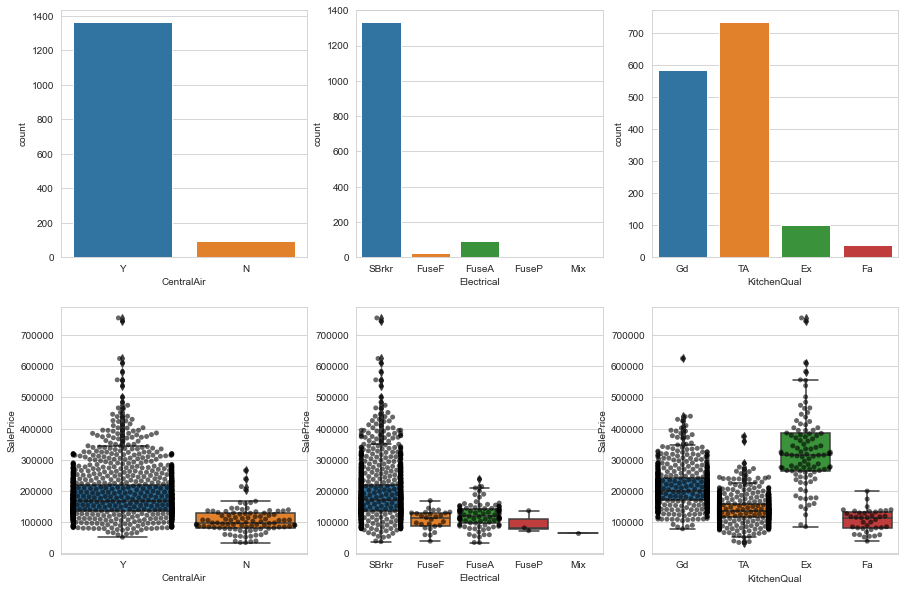

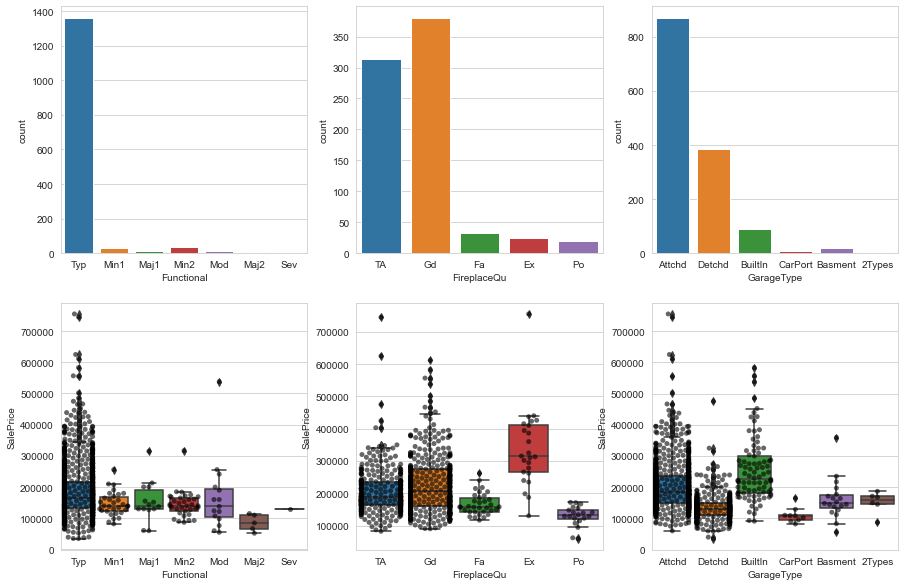

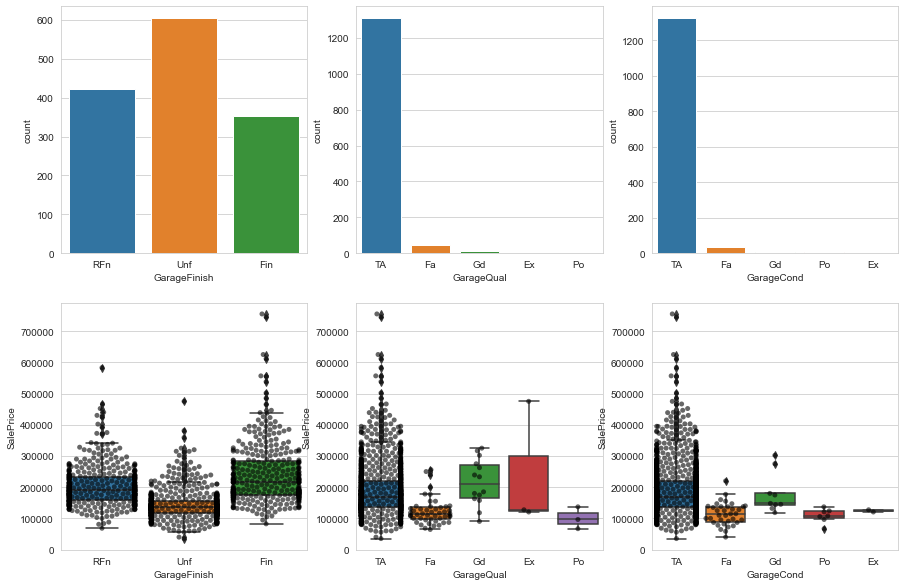

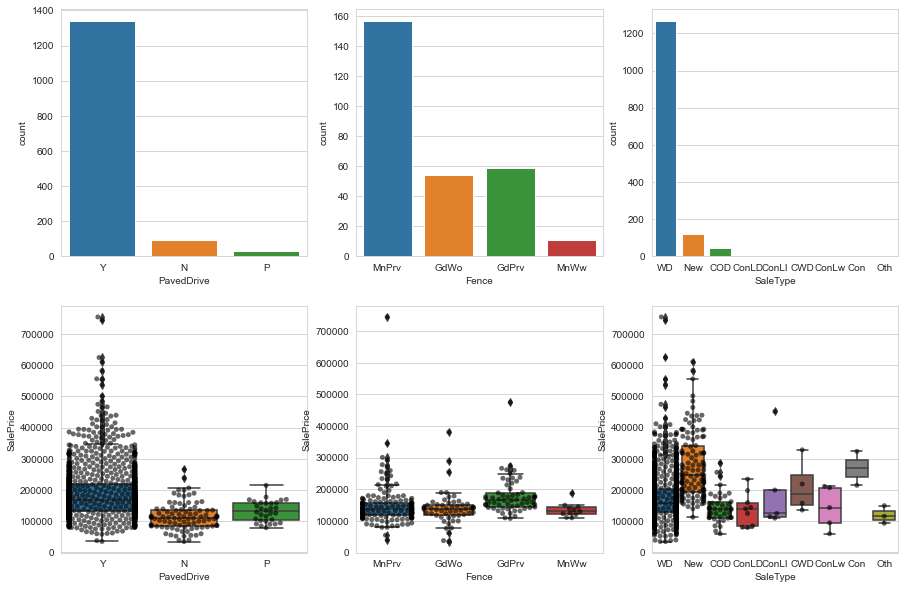

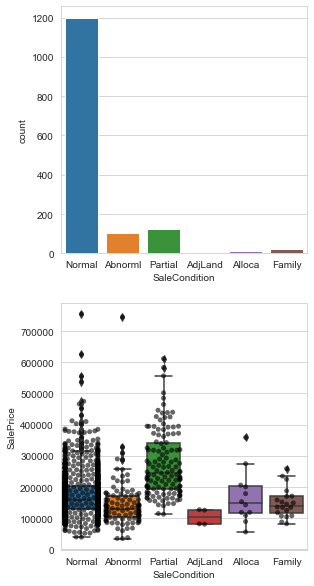

In [51]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(categorical_df.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = categorical_df, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=categorical_df, x=c, y='SalePrice', ax=ax2)
            sns.swarmplot(data=categorical_df, x=c, y='SalePrice', ax=ax2, color="k", alpha=0.6)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1


* 2. we will label encode categories and use the scikit-learn randomforestregressor() to predict nan values

In [76]:
temp = categorical_df.copy()

In [82]:
temp["FireplaceQu"]

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [81]:
temp["FireplaceQu"].astype("category").cat.codes

0      -1
1       4
2       4
3       2
4       4
       ..
1455    4
1456    4
1457    2
1458   -1
1459   -1
Length: 1460, dtype: int8

In [84]:
for feature in temp.columns:
    temp[feature] = temp[feature].astype("category").cat.codes
temp

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,-1,1,1,4,4,2,-1,8,4,412
1,3,1,3,3,0,2,0,24,1,2,...,4,1,1,4,4,2,-1,8,4,339
2,3,1,0,3,0,4,0,5,2,2,...,4,1,1,4,4,2,-1,8,4,442
3,3,1,0,3,0,0,0,6,2,2,...,2,5,2,4,4,2,-1,8,0,194
4,3,1,0,3,0,2,0,15,2,2,...,4,1,1,4,4,2,-1,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,1,1,4,4,2,-1,8,4,314
1456,3,1,3,3,0,4,0,14,2,2,...,4,1,2,4,4,2,2,8,4,415
1457,3,1,3,3,0,4,0,6,2,2,...,2,1,1,4,4,2,0,8,4,527
1458,3,1,3,3,0,4,0,12,2,2,...,-1,1,2,4,4,2,-1,8,4,199


**Every nan value is encoded as -1 so we will change them with np.nan** 

In [92]:
temp["FireplaceQu"].describe()

count    1460.000000
mean        0.969178
std         2.037956
min        -1.000000
25%        -1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: FireplaceQu, dtype: float64

In [94]:
temp["FireplaceQu"].replace({-1:np.nan})

0       NaN
1       4.0
2       4.0
3       2.0
4       4.0
       ... 
1455    4.0
1456    4.0
1457    2.0
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: float64

In [97]:
for feature in temp.columns:
    temp[feature].replace({-1:np.nan}, inplace=True)
temp

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,NaN,1.0,1.0,4.0,4.0,2,NaN,8,4,412
1,3,1,3,3,0,2,0,24,1,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,339
2,3,1,0,3,0,4,0,5,2,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,442
3,3,1,0,3,0,0,0,6,2,2,...,2.0,5.0,2.0,4.0,4.0,2,NaN,8,0,194
4,3,1,0,3,0,2,0,15,2,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,314
1456,3,1,3,3,0,4,0,14,2,2,...,4.0,1.0,2.0,4.0,4.0,2,2.0,8,4,415
1457,3,1,3,3,0,4,0,6,2,2,...,2.0,1.0,1.0,4.0,4.0,2,0.0,8,4,527
1458,3,1,3,3,0,4,0,12,2,2,...,NaN,1.0,2.0,4.0,4.0,2,NaN,8,4,199


In [101]:
temp["FireplaceQu"].isna().sum()

690

In [116]:
fill_train_indexes = temp["FireplaceQu"].dropna().index

In [117]:
fill_test_indexes = temp.loc[temp["FireplaceQu"].isna(), "FireplaceQu"].index

In [121]:
temp.loc[fill_train_indexes]#this is the train dataset

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
1,3,1,3,3,0,2,0,24,1,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,339
2,3,1,0,3,0,4,0,5,2,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,442
3,3,1,0,3,0,0,0,6,2,2,...,2.0,5.0,2.0,4.0,4.0,2,NaN,8,0,194
4,3,1,0,3,0,2,0,15,2,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,494
6,3,1,3,3,0,4,0,21,2,2,...,2.0,1.0,1.0,4.0,4.0,2,NaN,8,4,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,3,1,3,3,0,4,0,5,2,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,478
1451,3,1,3,3,0,4,0,21,2,2,...,2.0,1.0,0.0,4.0,4.0,2,NaN,6,5,557
1455,3,1,3,3,0,4,0,8,2,2,...,4.0,1.0,1.0,4.0,4.0,2,NaN,8,4,314
1456,3,1,3,3,0,4,0,14,2,2,...,4.0,1.0,2.0,4.0,4.0,2,2.0,8,4,415


In [122]:
temp.loc[fill_test_indexes]#this is the test dataset

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,NaN,1.0,1.0,4.0,4.0,2,NaN,8,4,412
5,3,1,0,3,0,4,0,11,2,2,...,NaN,1.0,2.0,4.0,4.0,2,2.0,8,4,203
10,3,1,3,3,0,4,0,19,2,2,...,NaN,5.0,2.0,4.0,4.0,2,NaN,8,4,150
12,3,1,1,3,0,4,0,19,2,2,...,NaN,5.0,2.0,4.0,4.0,2,NaN,8,4,208
15,4,1,3,3,0,0,0,3,2,2,...,NaN,5.0,2.0,4.0,4.0,2,0.0,8,4,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4,1,3,3,0,4,0,7,2,2,...,NaN,2.0,0.0,4.0,4.0,2,NaN,8,4,212
1453,3,1,3,3,0,4,0,11,2,2,...,NaN,NaN,NaN,NaN,NaN,2,NaN,8,0,36
1454,1,1,3,3,0,4,0,21,2,2,...,NaN,1.0,1.0,4.0,4.0,2,NaN,8,4,351
1458,3,1,3,3,0,4,0,12,2,2,...,NaN,1.0,2.0,4.0,4.0,2,NaN,8,4,199


In [125]:
temp.loc[fill_train_indexes].drop("FireplaceQu", axis=1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
1,3,1,3,3,0,2,0,24,1,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,339
2,3,1,0,3,0,4,0,5,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,442
3,3,1,0,3,0,0,0,6,2,2,...,6,5.0,2.0,4.0,4.0,2,NaN,8,0,194
4,3,1,0,3,0,2,0,15,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,494
6,3,1,3,3,0,4,0,21,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,3,1,3,3,0,4,0,5,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,478
1451,3,1,3,3,0,4,0,21,2,2,...,6,1.0,0.0,4.0,4.0,2,NaN,6,5,557
1455,3,1,3,3,0,4,0,8,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,314
1456,3,1,3,3,0,4,0,14,2,2,...,2,1.0,2.0,4.0,4.0,2,2.0,8,4,415


In [126]:
fill_values_x = temp.loc[fill_train_indexes].drop("FireplaceQu", axis=1)
fill_values_y = temp.loc[fill_train_indexes, "FireplaceQu"]
fill_values_x

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,SalePrice
1,3,1,3,3,0,2,0,24,1,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,339
2,3,1,0,3,0,4,0,5,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,442
3,3,1,0,3,0,0,0,6,2,2,...,6,5.0,2.0,4.0,4.0,2,NaN,8,0,194
4,3,1,0,3,0,2,0,15,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,494
6,3,1,3,3,0,4,0,21,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,3,1,3,3,0,4,0,5,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,478
1451,3,1,3,3,0,4,0,21,2,2,...,6,1.0,0.0,4.0,4.0,2,NaN,6,5,557
1455,3,1,3,3,0,4,0,8,2,2,...,6,1.0,1.0,4.0,4.0,2,NaN,8,4,314
1456,3,1,3,3,0,4,0,14,2,2,...,2,1.0,2.0,4.0,4.0,2,2.0,8,4,415


In [133]:
fill_values_y

1       4.0
2       4.0
3       2.0
4       4.0
6       2.0
       ... 
1447    4.0
1451    2.0
1455    4.0
1456    4.0
1457    2.0
Name: FireplaceQu, Length: 770, dtype: float64

**First we converted -1 values to nan because we needed to use the pandas dropna function.But now we have to make them -1 again because ML model cant handle missing values**

In [136]:
for col in fill_values_x.columns:
    fill_values_x[col].fillna(-1, inplace=True)

In [138]:
from sklearn.ensemble import RandomForestClassifier

fill_model = RandomForestClassifier()

fill_model.fit(fill_values_x, fill_values_y)

RandomForestClassifier()

In [140]:
fill_values_test_x = temp.loc[fill_test_indexes].drop("FireplaceQu", axis=1)
fill_values_test_y = temp.loc[fill_test_indexes, "FireplaceQu"]
for col in fill_values_test_x.columns:
    fill_values_test_x[col].fillna(-1, inplace=True)

In [141]:
fill_values_test_y

0      NaN
5      NaN
10     NaN
12     NaN
15     NaN
        ..
1452   NaN
1453   NaN
1454   NaN
1458   NaN
1459   NaN
Name: FireplaceQu, Length: 690, dtype: float64

In [144]:
fill_model.predict(fill_values_test_x)

array([4., 2., 2., 2., 2., 4., 2., 4., 2., 2., 2., 4., 2., 4., 2., 2., 4.,
       2., 2., 2., 2., 1., 4., 2., 4., 4., 2., 2., 2., 2., 4., 4., 2., 2.,
       2., 2., 4., 2., 2., 4., 2., 4., 2., 2., 2., 2., 2., 2., 2., 4., 4.,
       2., 2., 4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 4., 2., 4., 2., 2.,
       4., 4., 4., 2., 4., 2., 2., 2., 4., 2., 1., 2., 2., 2., 4., 2., 2.,
       2., 2., 2., 2., 2., 4., 2., 4., 4., 2., 2., 2., 2., 4., 2., 4., 2.,
       2., 4., 4., 4., 4., 2., 2., 2., 2., 2., 2., 4., 2., 2., 4., 4., 2.,
       2., 2., 2., 2., 2., 2., 4., 4., 2., 2., 2., 2., 2., 4., 2., 2., 2.,
       2., 4., 2., 3., 1., 2., 2., 4., 2., 2., 2., 2., 2., 2., 2., 2., 4.,
       2., 2., 2., 2., 4., 4., 2., 2., 2., 3., 4., 2., 2., 2., 2., 2., 4.,
       2., 2., 2., 2., 4., 4., 2., 4., 4., 2., 2., 4., 2., 4., 2., 2., 2.,
       2., 2., 2., 2., 4., 2., 2., 2., 2., 4., 2., 2., 2., 4., 2., 2., 4.,
       2., 2., 2., 2., 2., 2., 2., 2., 4., 2., 2., 4., 4., 4., 4., 4., 2.,
       4., 2., 4., 2., 4.

**Making it into a function->>>**

In [154]:
def fill_categorical(df_train, df_test):
    from sklearn.ensemble import RandomForestClassifier
    categorical_columns = []
    for feature, content in df_train.items():
        if pd.api.types.is_string_dtype(content):
            categorical_columns.append(feature)

    
    for feature in categorical_columns:
        
        #label encoding every categorical feature.
        #-->>
        df_train[feature] = df_train[feature].astype("category").cat.codes
        df_test[feature]  = df_test[feature].astype("category").cat.codes
        
        #replacing ''-1' values with np.nan(which were nan values  prior to label encoding)
        #we need it to use the pandas dropna() and isna() functions.
        #-->>
    for feature in categorical_columns:
        
        #getting the indexes of train data (which have no nan values, therefore suitable for ML algorithm)
        #-->>
        train_indexes_1 = df_train[feature].dropna().index
        train_indexes_2 = df_test[feature].dropna().index
        #getting the indexes of test data (which contains nan values)
        #-->>
        test_indexes_1 = df_train[df_train[feature].isna()].index
        test_indexes_2 = df_test[df_test[feature].isna()].index
        #seperating train and test data to X and y for ML algorithm
        #-->>
        #1 refers to the original train data set 2 refers to the original test dataset
        X_train_1 = df_train.loc[train_indexes_1].drop(feature, axis=1)
        y_train_1 = df_train.loc[train_indexes_1, feature]
        X_test_1 = df_train.loc[test_indexes_1].drop(feature, axis=1)
        y_test_1 = df_train.loc[test_indexes_1, feature]
        
        X_train_2 = df_test.loc[train_indexes_2].drop(feature, axis=1)
        y_train_2 = df_test.loc[train_indexes_2, feature]
        X_test_2 = df_test.loc[test_indexes_2].drop(feature, axis=1)
        y_test_2 = df_test.loc[test_indexes_2, feature]
        
        #before applying ML algorithm we must fill nan values with -1,since RandomForestClassifier can't handle missing values
        #and of course filling the missing values in numerical features as well. 
        #-->>
        for feature, content in X_train_1.items():
            if feature != "SalePrice":
                if pd.api.types.is_string_dtype(content):
                    X_train_1[feature].fillna(-1, inplace=True)
                    X_test_1[feature].fillna(-1, inplace=True)
                    X_train_2[feature].fillna(-1, inplace=True)
                    X_test_2[feature].fillna(-1, inplace=True)
                else:
                    X_train_1[feature].fillna(X_train_1[feature].median(), inplace=True)
                    X_test_1[feature].fillna(X_test_1[feature].median(), inplace=True)
                    X_train_2[feature].fillna(X_train_2[feature].median(), inplace=True)
                    X_test_2[feature].fillna(X_test_2[feature].median(), inplace=True)
                
        model = RandomForestClassifier()
        model.fit(X_train_1, y_train_1)
        #seperating test(this test data is different than the df_train) data to X_test and y_test for ML algorithm
        #-->>
        X_predict = df_train.loc[test_indexes_1].drop(feature, axis=1)
        y_preds = model.predict(X_predict)
        #y_test = df_train.loc[test_indexes, feature](this isn't needed) we only need the test_indexes, which we already have
        #now just put the predictions where they belong
        df_train.loc[test_indexes_1, feature] = y_preds
        
        del model
        model = RandomForestClassifier()
        
        X_predict = df_test.loc[test_indexes_2].drop(feature, axis=1)
        y_preds = model.predict(X_predict)
        df_test.loc[test_indexes_2, feature] = y_preds
        
        return df_train, df_test

In [155]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df_train_filled, df_test_filled = fill_categorical(df_train, df_test)

ValueError: Found array with 0 sample(s) (shape=(0, 80)) while a minimum of 1 is required.

* 3.we will encode categories by selecting categories and their corresponding price, and we will get the median saleprice of that particular category(this can be applied only to train data, since there is no saleprice information in the test data.But we will replace the categories in test with the median prices of the train data's categories of each feature)

**Note(to not confuse with terms): feature is used as a column, category is used as the distinct categories of that particular column**

In [58]:
categories = temp["FireplaceQu"].value_counts().index

In [67]:
temp["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [75]:
temp.loc[temp["FireplaceQu"] == "Gd", "SalePrice"].median()
# this is the median of saleprices of category "Gd" for feature "FireplaceQu"

206950.0